In [217]:
# Regression

In [218]:
import pandas as pd
import seaborn 
from matplotlib import pyplot

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, scale

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

### 1. EyeBalling and Understanding Data

In [219]:
# Reading dataset

data = pd.read_csv("./train.csv")

In [220]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [221]:
print("Data Shape: ",data.shape)

Data Shape:  (1460, 81)


In [222]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [224]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

* A number of columns like (Fence, MiscFeture, PoolQC, Alley ..etc) contains a significant number of null rows.
  So dropping the rows is not a good approach as it will result in loss of significant data
  So replacing the NaN values with appropriate value based on column will be much better, provided it does not make the model bias.
  
  
  * Removing categorical columns (Alley, Fence and MiscFeature) with lots of missing rows

In [225]:
data['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [226]:
data['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [227]:
data['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [228]:
# dropping columns

data = data.drop(['Alley','Fence','MiscFeature','PoolQC'],axis=1)

In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

* Null rows in categorical variables will be handled during one hot encoding so handing missing categorical rows
is not required.
* Need to handle missing values from numeric columns ('LotFrontage','GarageYrBlt','MasVnrArea') by dropping them or replacing them with mean, median or mode
 'GarageYrBlt' is year (a categorical feature) but is represented as numeric in dataset , so need to parse this to object datatype.

In [230]:
# Numeric columns with missing values

data[['LotFrontage','GarageYrBlt','MasVnrArea']]

,LotFrontage,GarageYrBlt,MasVnrArea
0,65.0,2003.0,196.0
1,80.0,1976.0,0.0
2,68.0,2001.0,162.0
3,60.0,1998.0,0.0
4,84.0,2000.0,350.0
...,...,...,...
1455,62.0,1999.0,0.0
1456,85.0,1978.0,119.0
1457,66.0,1941.0,0.0
1458,68.0,1950.0,0.0


In [231]:
# Parsing data types

data['GarageYrBlt'] = data['GarageYrBlt'].astype('object')

In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

/home/sam/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='Id', ylabel='LotFrontage'>

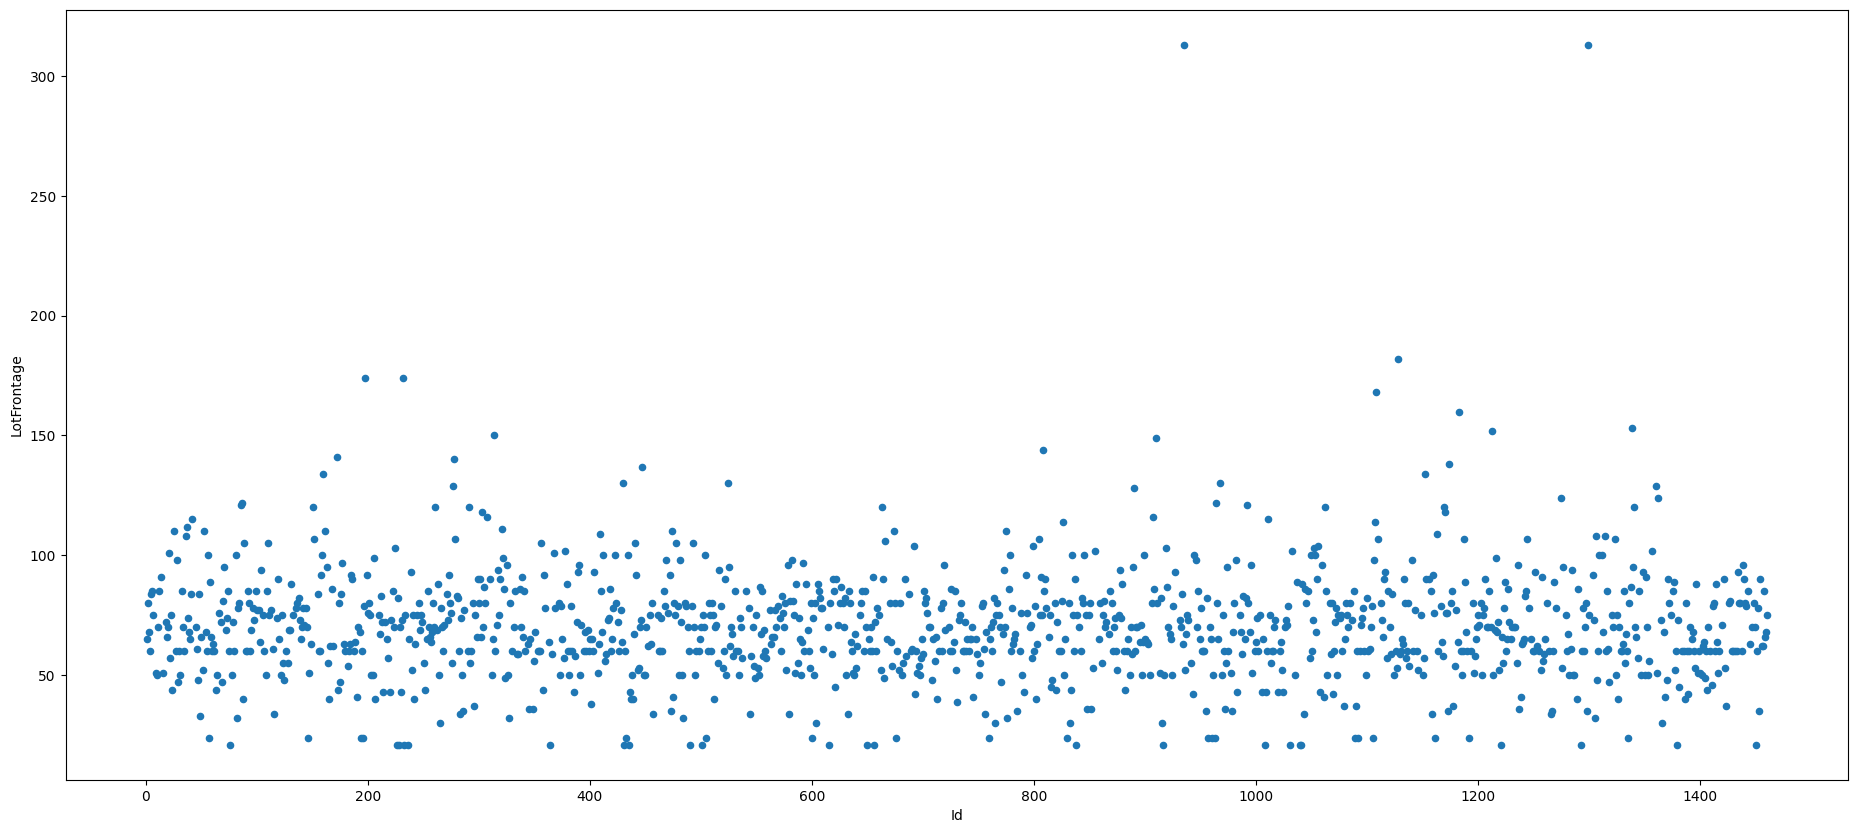

In [233]:
data.plot.scatter(x='Id',y='LotFrontage',figsize=(23,10))

<AxesSubplot: xlabel='Id', ylabel='MasVnrArea'>

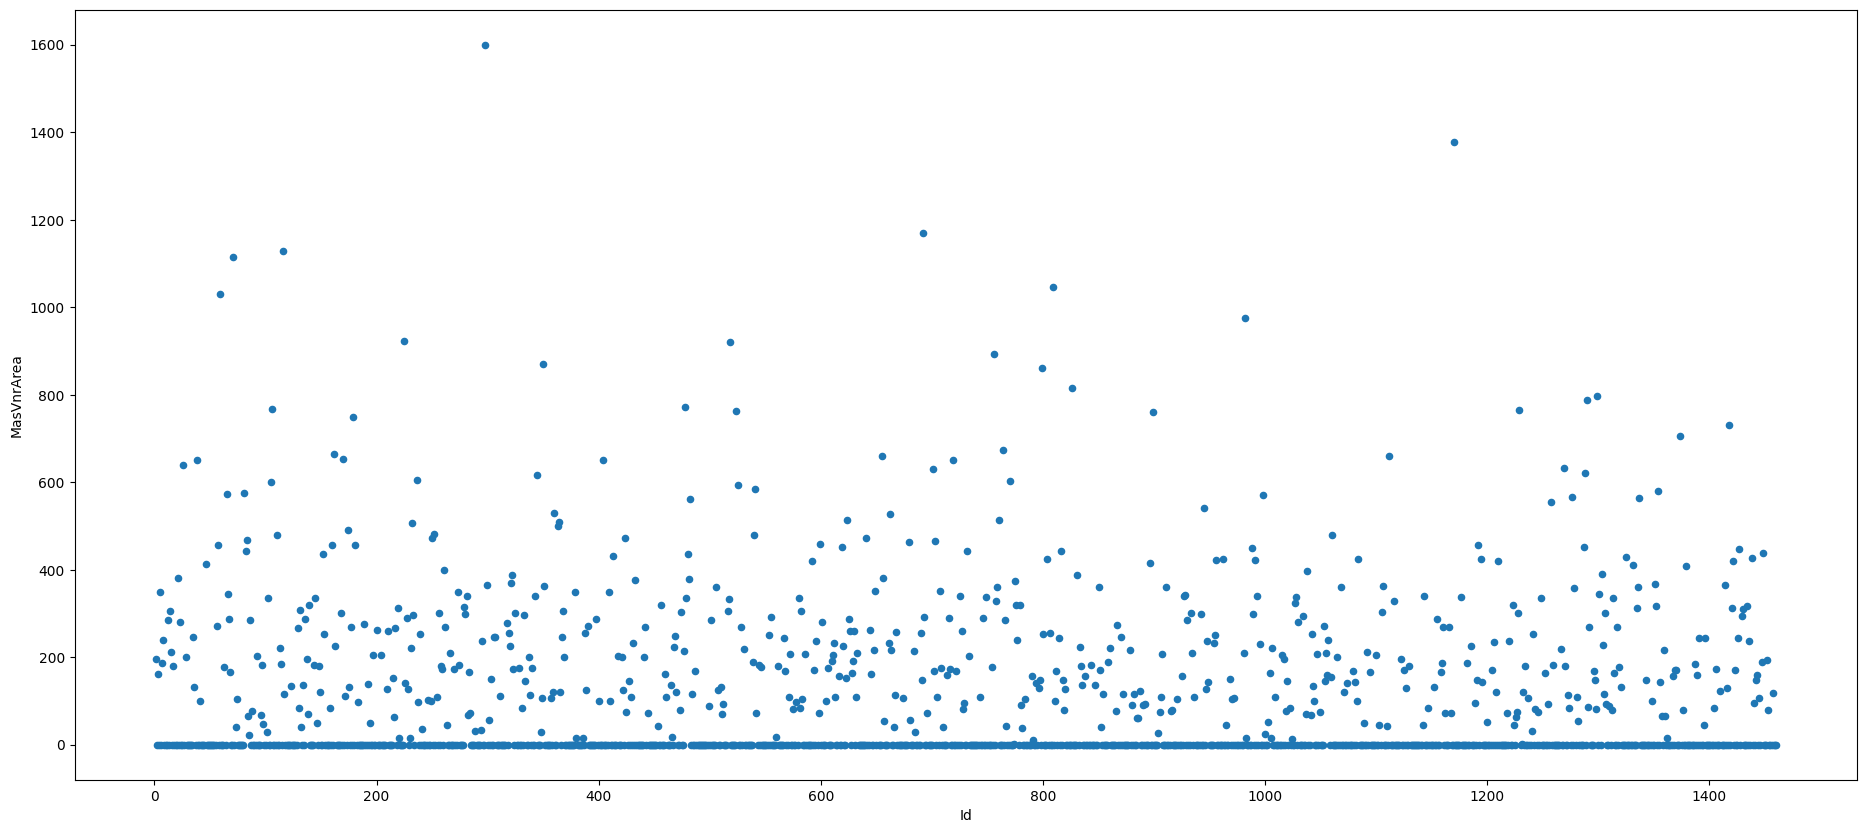

In [234]:
data.plot.scatter(x='Id',y='MasVnrArea',figsize=(23,10))

In [235]:
def create_box_plots(df,r,w,columns):
    fig, axes = pyplot.subplots(nrows=r,ncols=w,figsize=(20,15))
    for ax,column in zip(axes,columns):
        df.boxplot(column=[column],figsize=fig,ax=ax)
    
    return 200

200

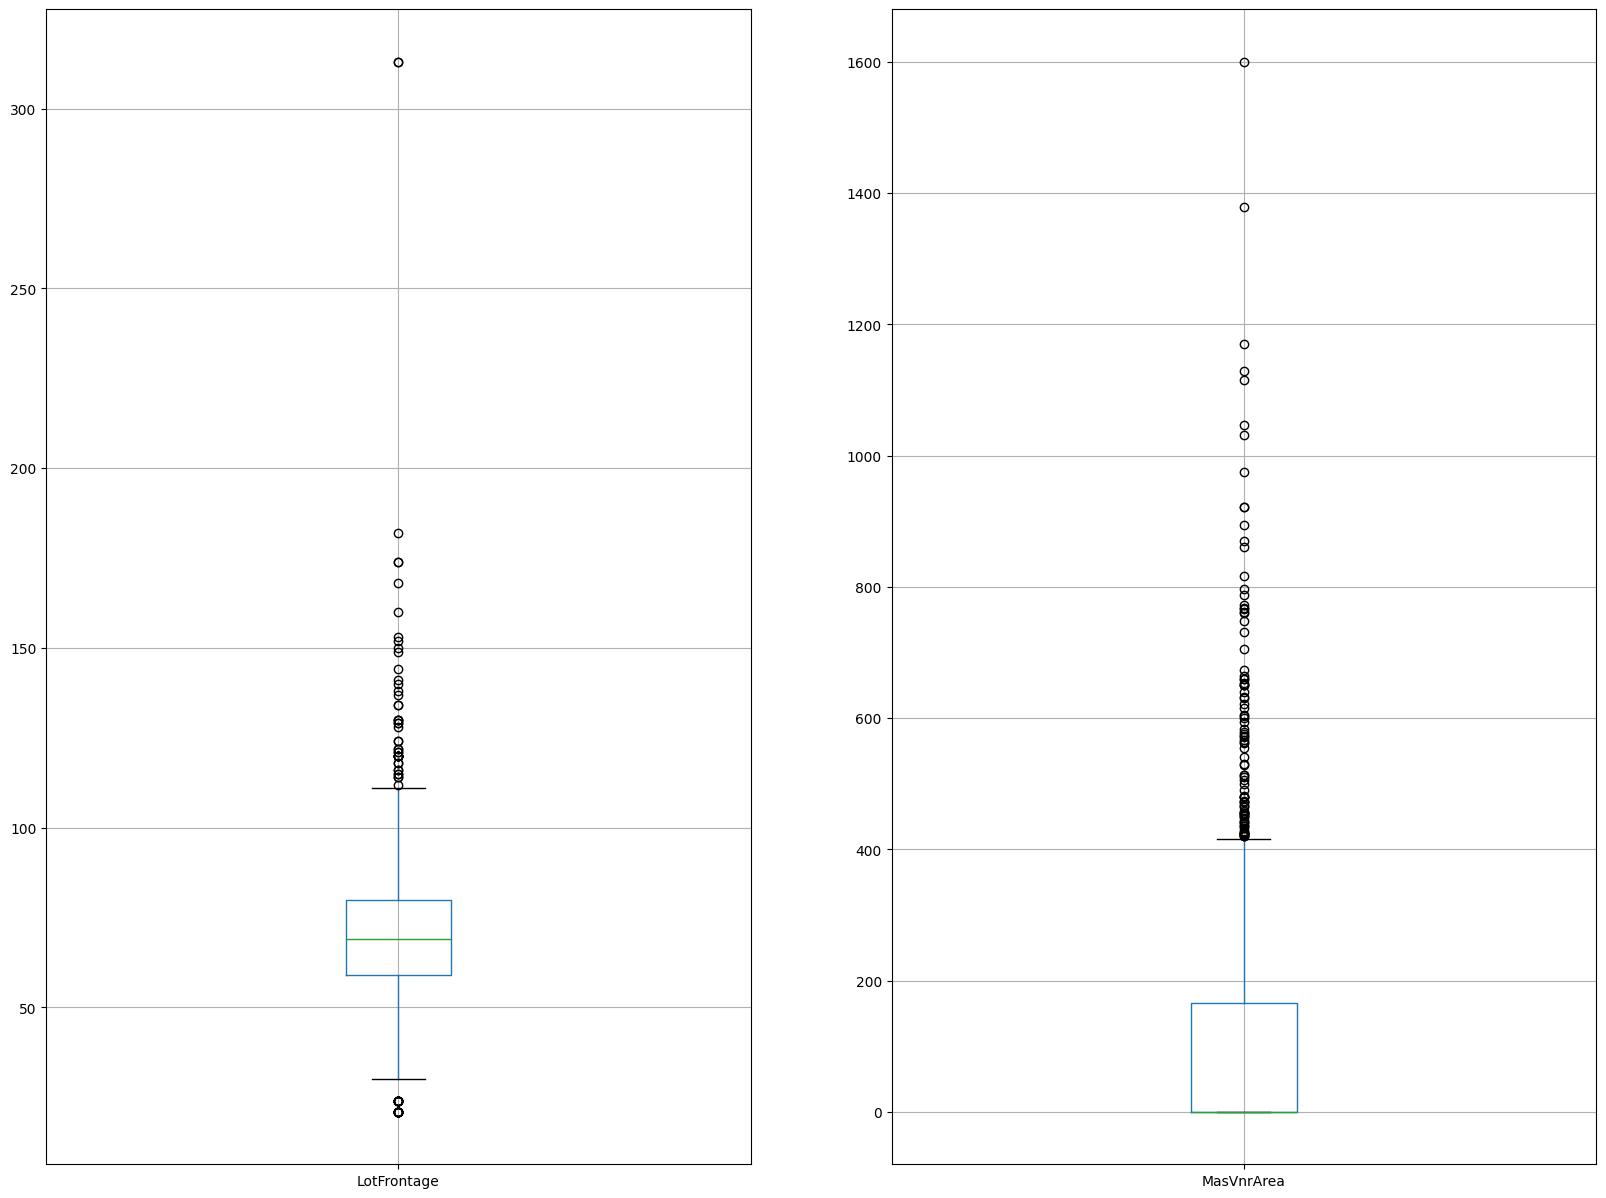

In [236]:
create_box_plots(data,1,2,['LotFrontage','MasVnrArea'])

In [237]:
print(data[['LotFrontage','MasVnrArea']].describe(percentiles=[0.1,0.2,0.5,0.55,0.6,0.75,0.9,0.95,0.99,0.995,0.998,1.0]))
print("")
print("Median: LotFrontage={}, MasVnrArea={}".format(data.LotFrontage.median(),data.MasVnrArea.median()))

       LotFrontage   MasVnrArea
count  1201.000000  1452.000000
mean     70.049958   103.685262
std      24.284752   181.066207
min      21.000000     0.000000
10%      44.000000     0.000000
20%      53.000000     0.000000
50%      69.000000     0.000000
55%      70.000000     0.000000
60%      74.000000    16.000000
75%      80.000000   166.000000
90%      96.000000   335.000000
95%     107.000000   456.000000
99%     141.000000   791.920000
99.5%   160.000000   961.485000
99.8%   178.800000  1133.018000
100%    313.000000  1600.000000
max     313.000000  1600.000000

Median: LotFrontage=69.0, MasVnrArea=0.0


* As visible from the above plots there are few outliers in 'LotFrontage' so removing them and then taking mean will be replacement for missing values.

* As visible in 'MasVnrArea' there are large number of rows close to 0 (atleast 55% from quantile description).

In [238]:
data[(data.MasVnrArea>16) & (data.MasVnrArea<1200)]['MasVnrArea'].mean()

255.07612456747404

In [239]:
# Lot frontage mean after stripping outliers after 250 , 2 rows

LotFrontage_mean_after_stripping_outliers = data[data.LotFrontage<250]['LotFrontage'].mean()
MasVnrArea_mean_after_stripping_outliers = data[(data.MasVnrArea>16) & (data.MasVnrArea<1200)]['MasVnrArea'].mean()

In [240]:
data[['LotFrontage','MasVnrArea']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   MasVnrArea   1452 non-null   float64
dtypes: float64(2)
memory usage: 22.9 KB


In [241]:
data['LotFrontage'] = data.LotFrontage.fillna(LotFrontage_mean_after_stripping_outliers)
data['MasVnrArea'] = data.MasVnrArea.fillna(MasVnrArea_mean_after_stripping_outliers)

In [242]:
data[['LotFrontage','MasVnrArea']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1460 non-null   float64
 1   MasVnrArea   1460 non-null   float64
dtypes: float64(2)
memory usage: 22.9 KB


* As we can see non-null values have become equal to dataset shape

In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [244]:
# Selecting seperating numeric and other datatypes

numeric_df = data.select_dtypes(include=['int64','float64'])
object_df = data.select_dtypes(include=['object'])

In [245]:
# numeric columns subset

numeric_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [246]:
### Exploring numeric data

In [247]:
# Generic explore function
def explore_numeric_columns(column):
    print("Data Description: ")
    numeric_df[column].describe(percentiles=[0.1,0.25,0.50,0.75,0.90,0.95])
    print("Data Plot: ")
    
    numeric_df[column].plot(figsize=(10,5),title=column)
    

/tmp/ipykernel_16929/2602203684.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = pyplot.subplots(nrows=2,ncols=1,figsize=(40,30))


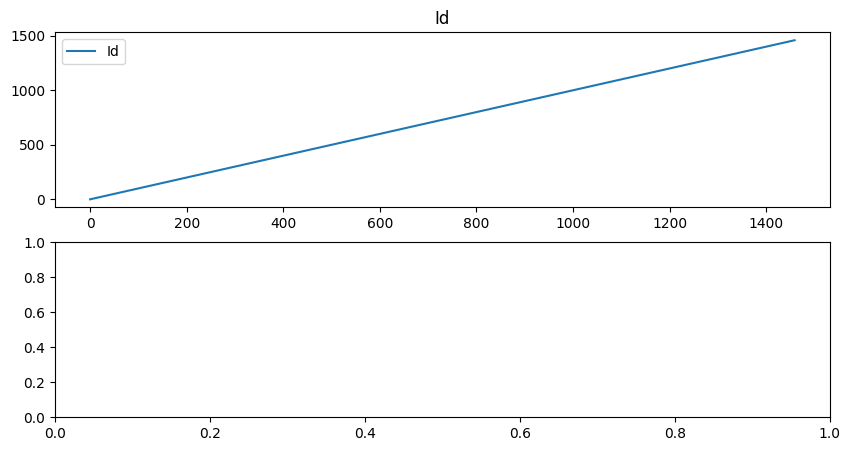

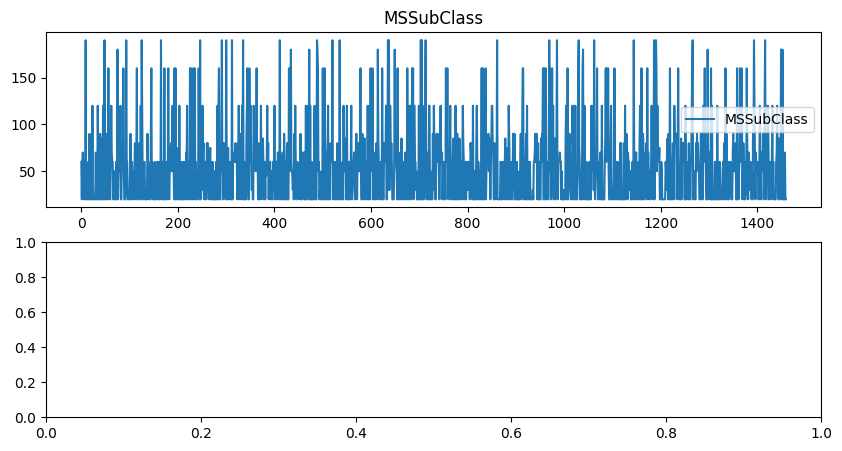

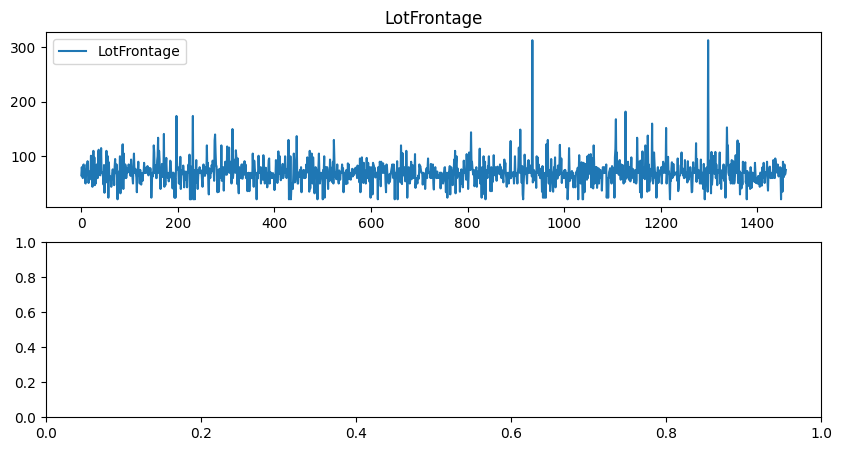

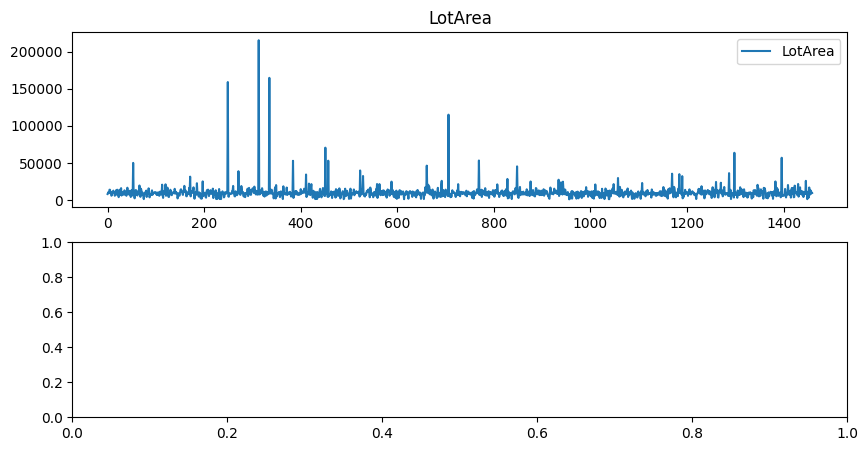

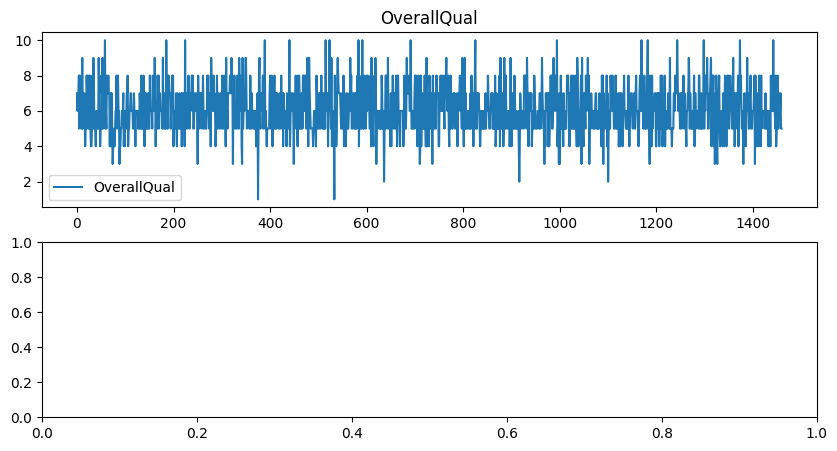

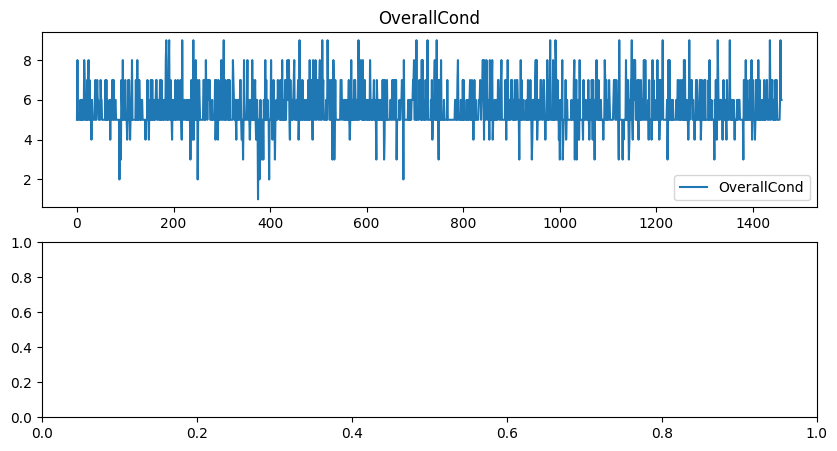

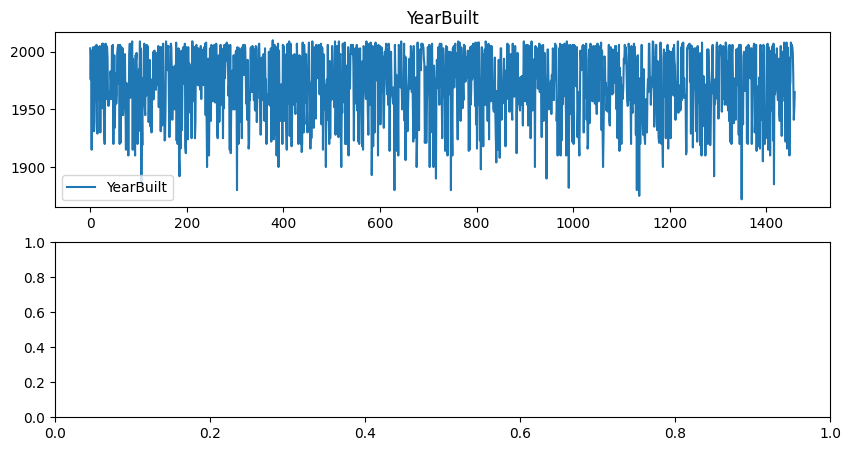

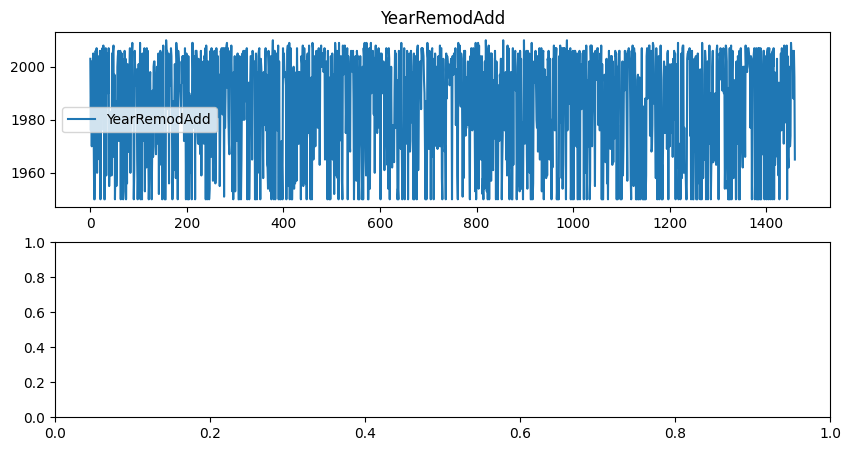

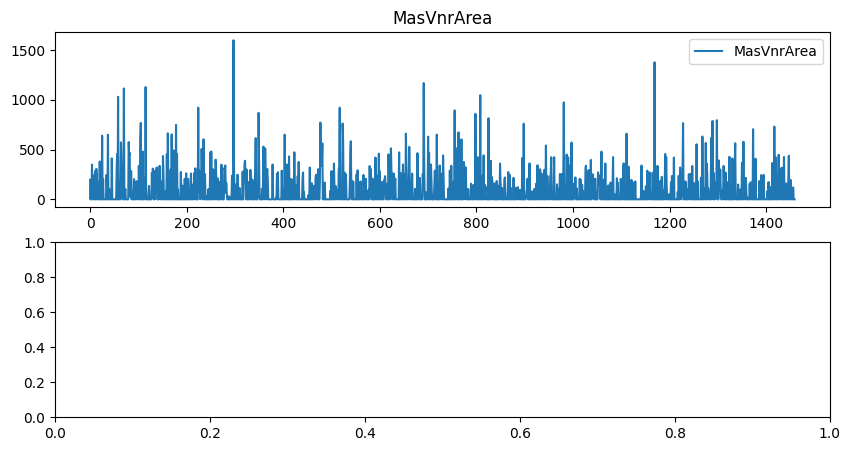

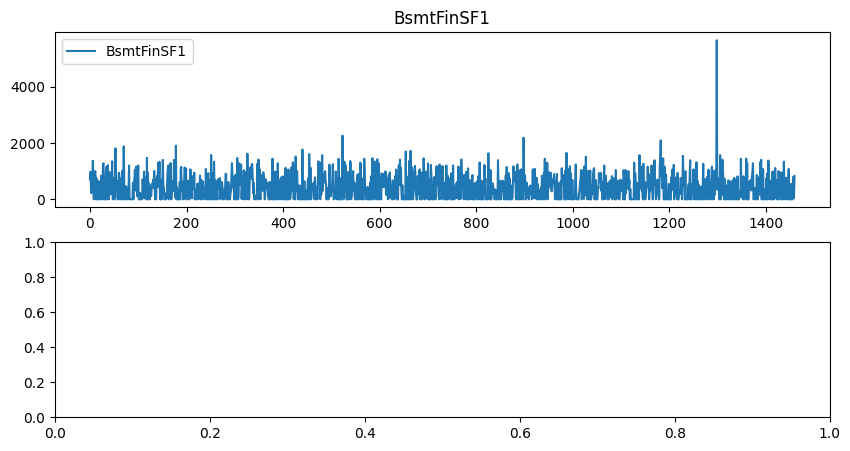

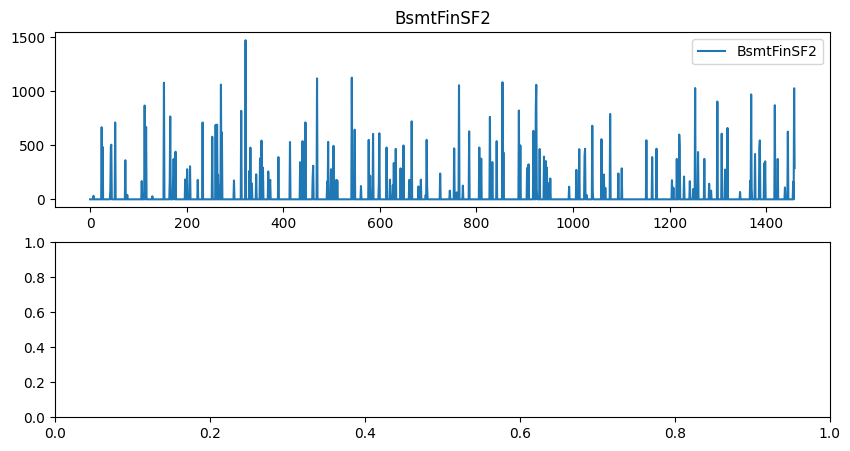

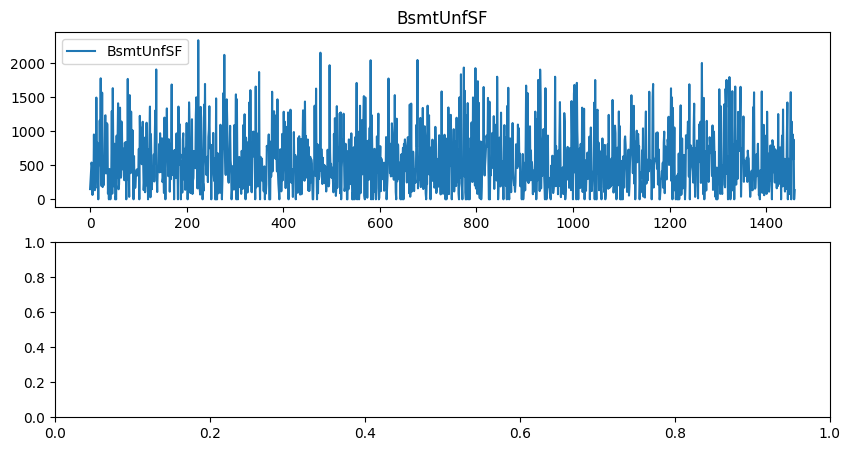

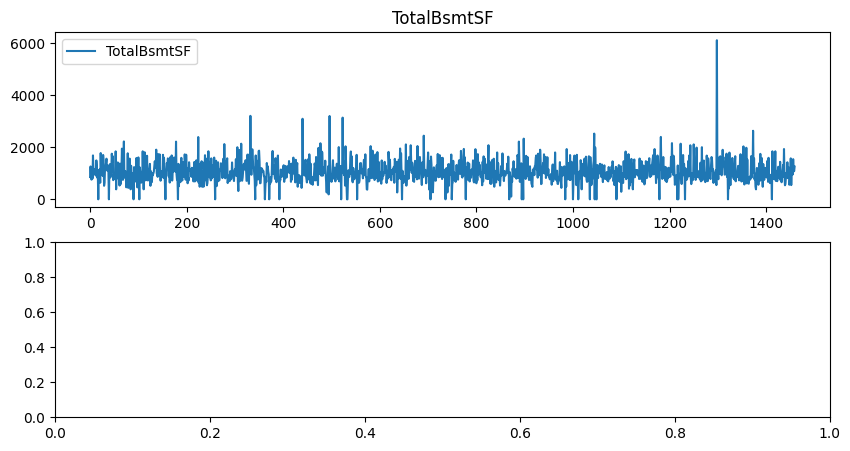

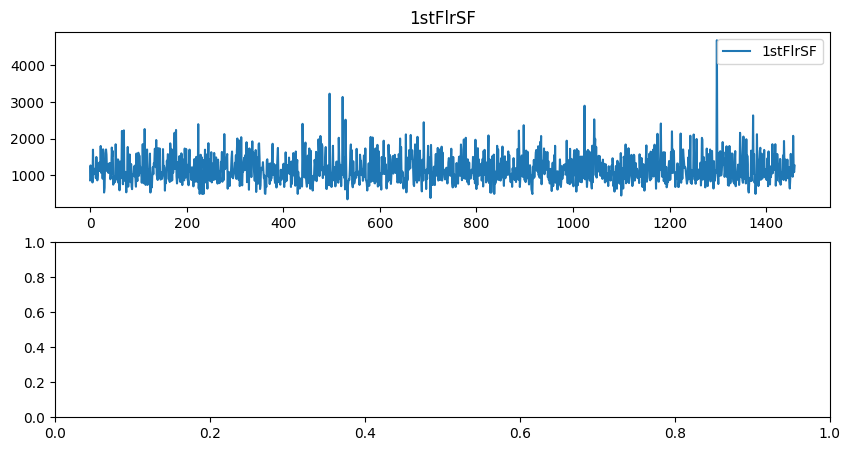

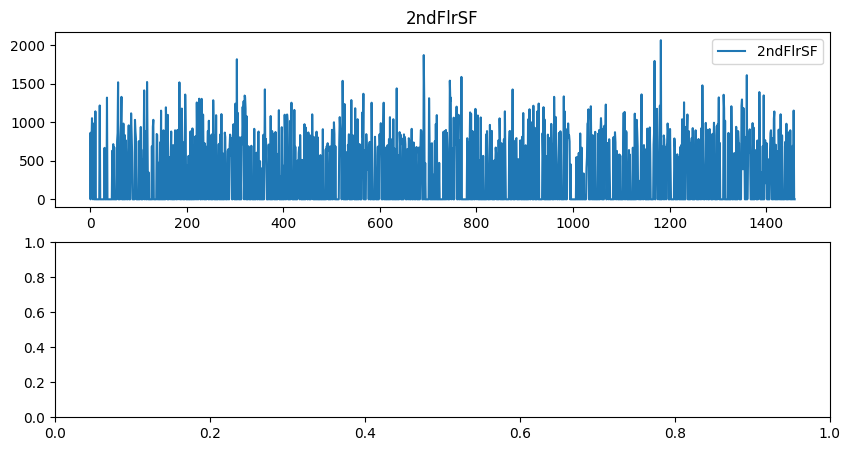

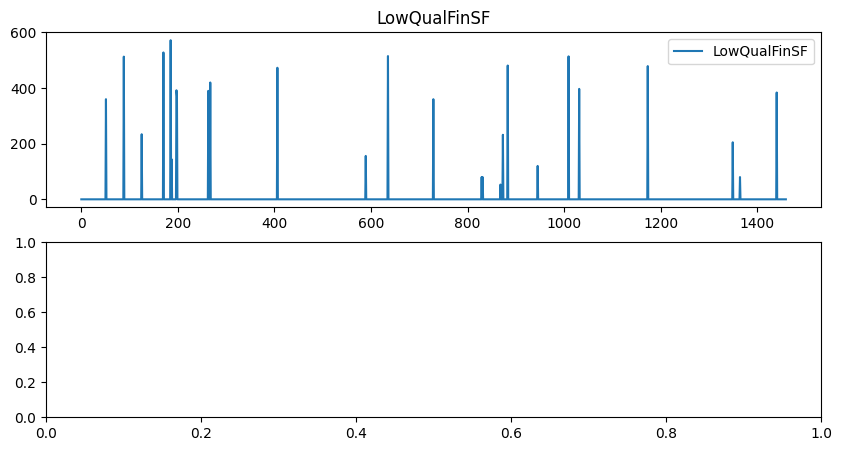

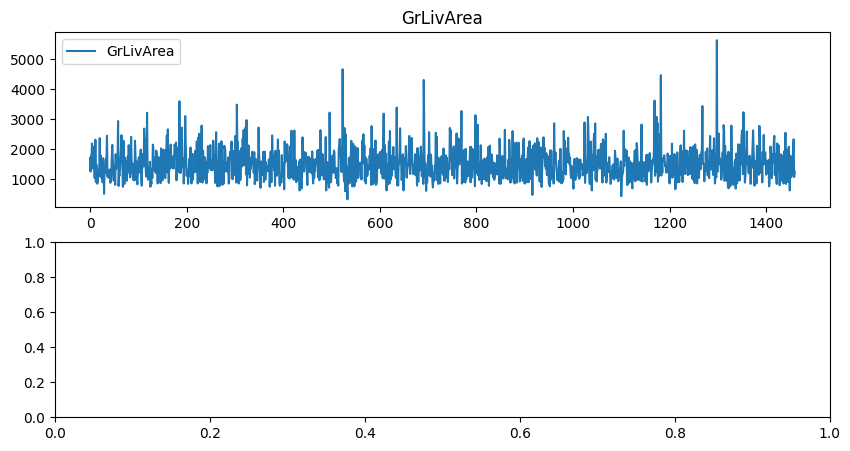

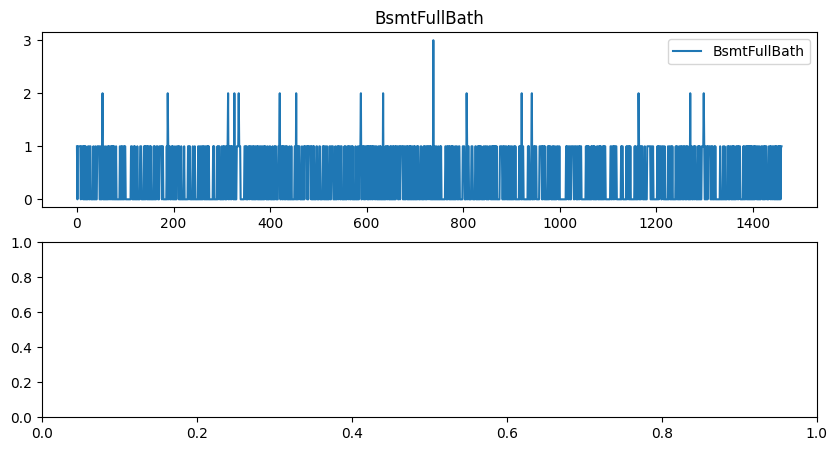

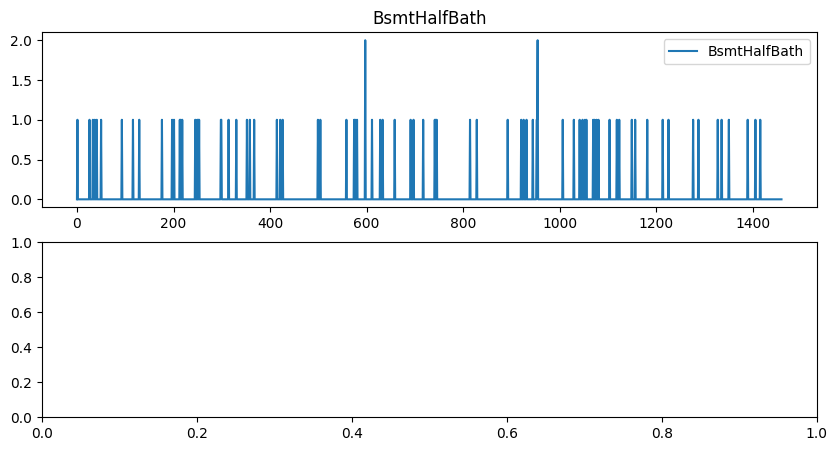

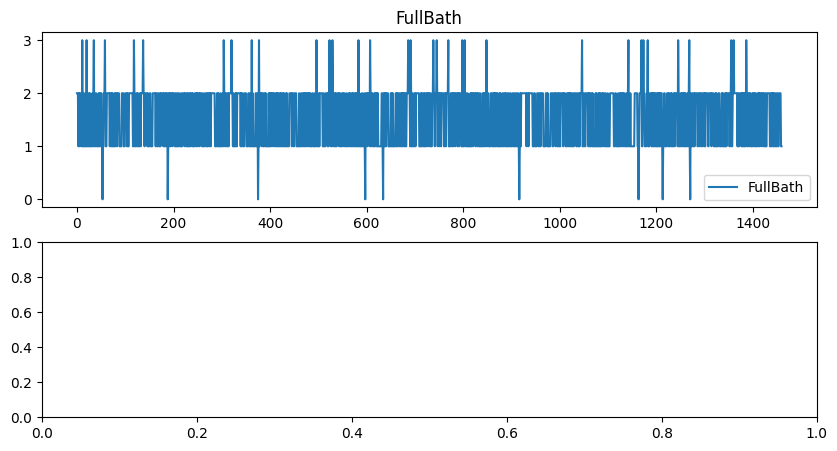

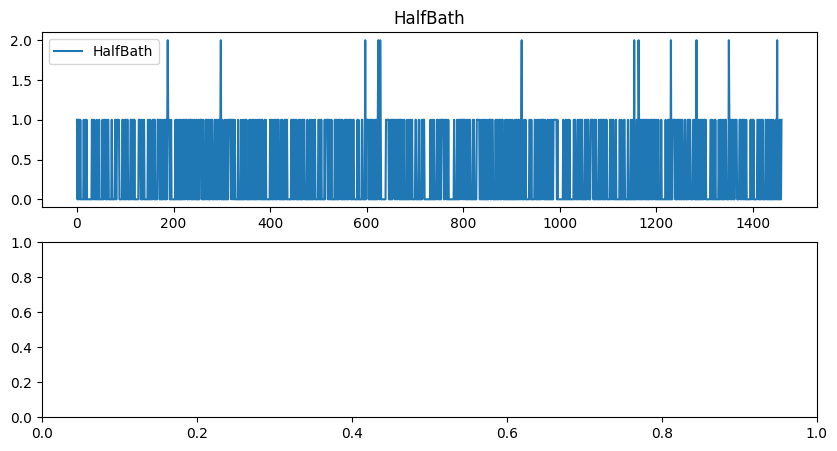

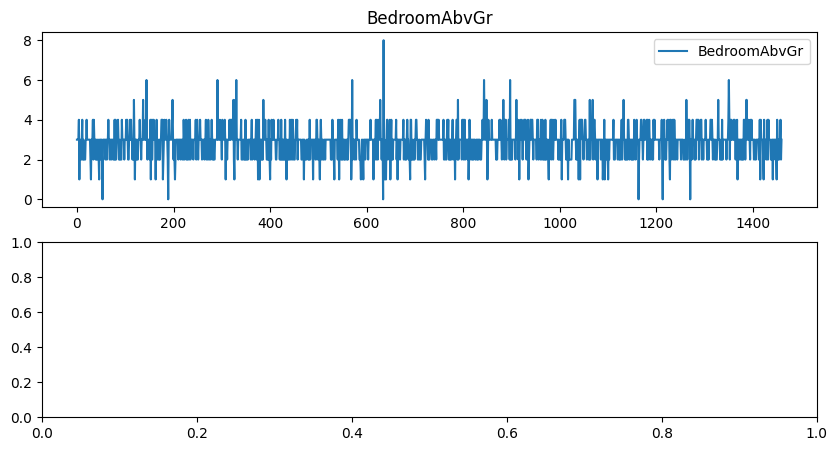

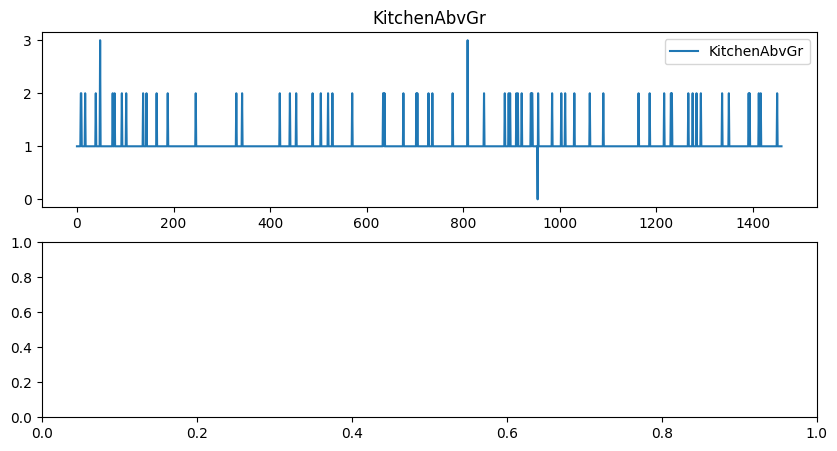

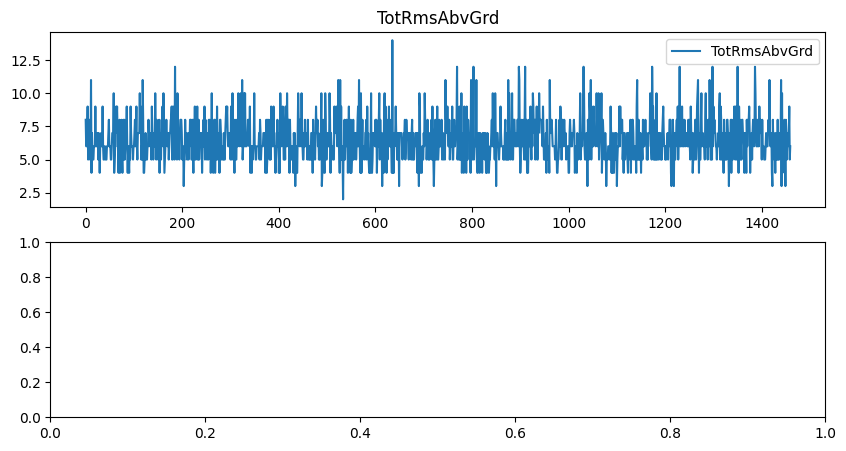

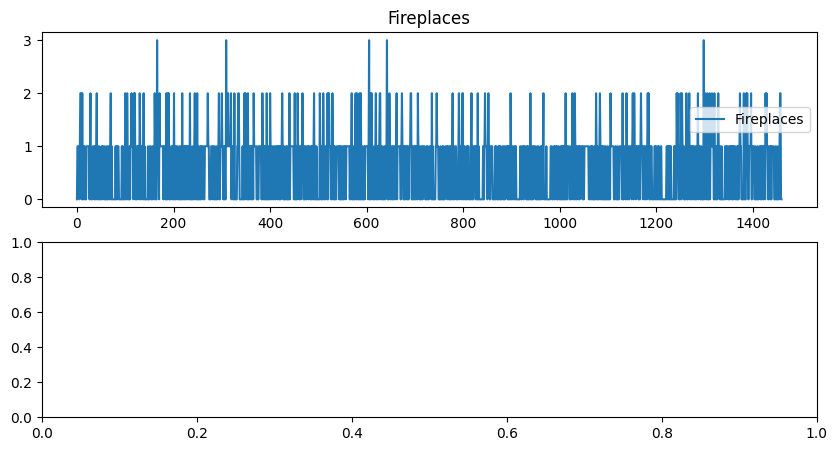

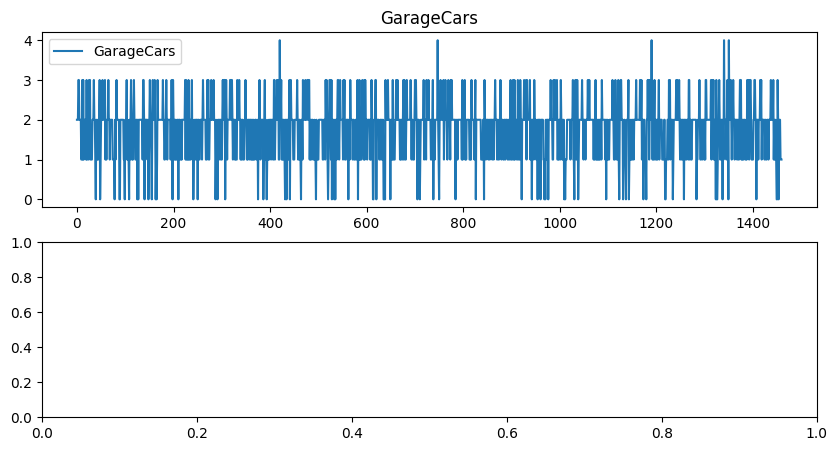

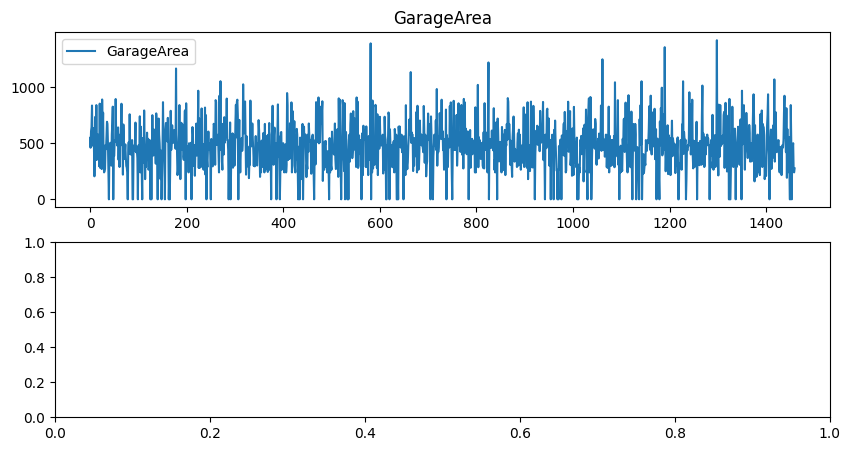

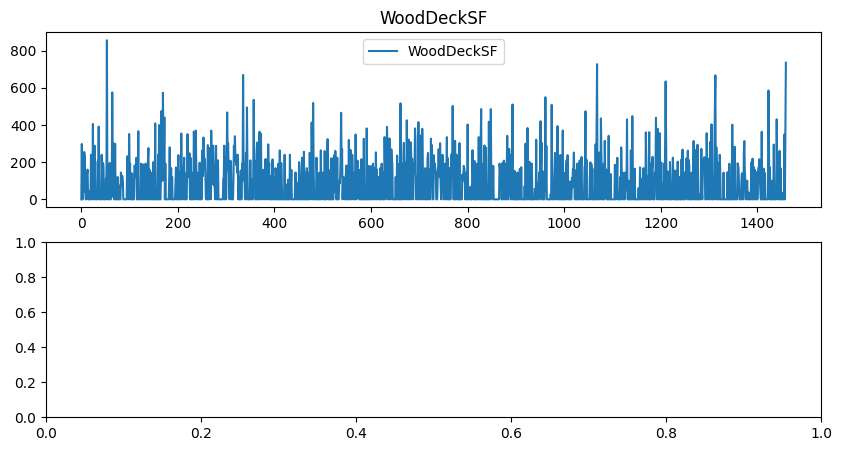

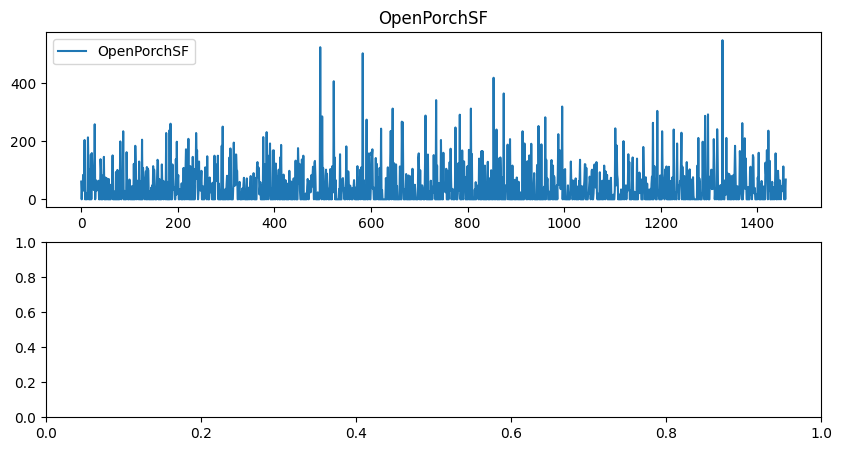

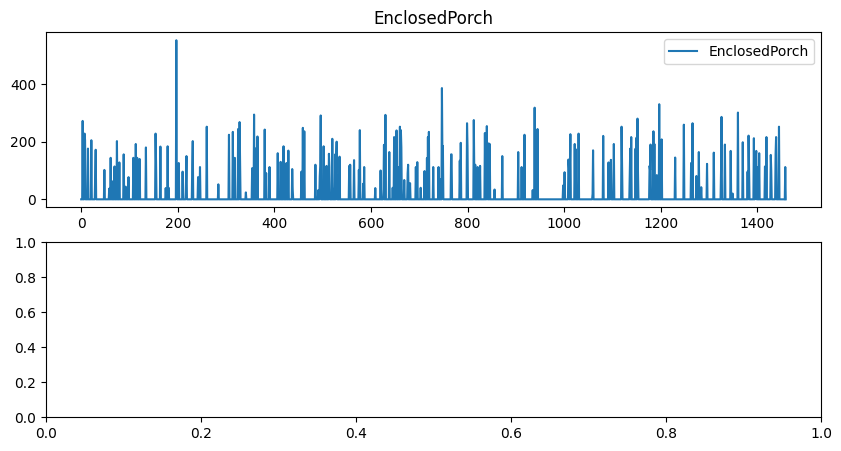

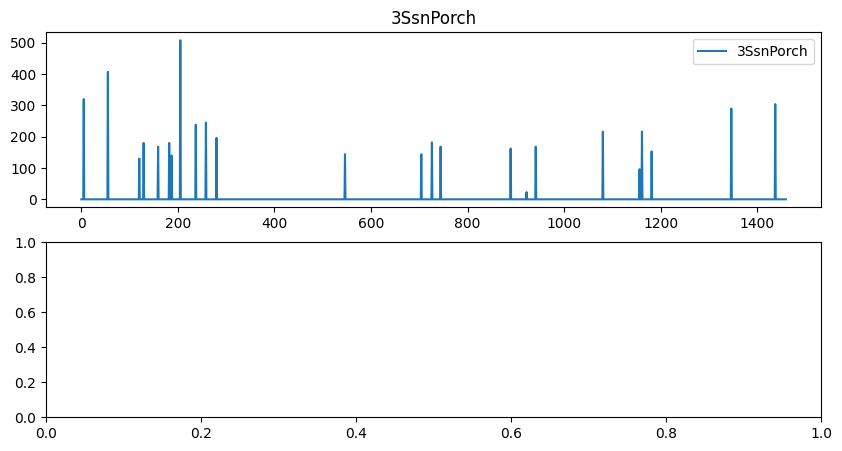

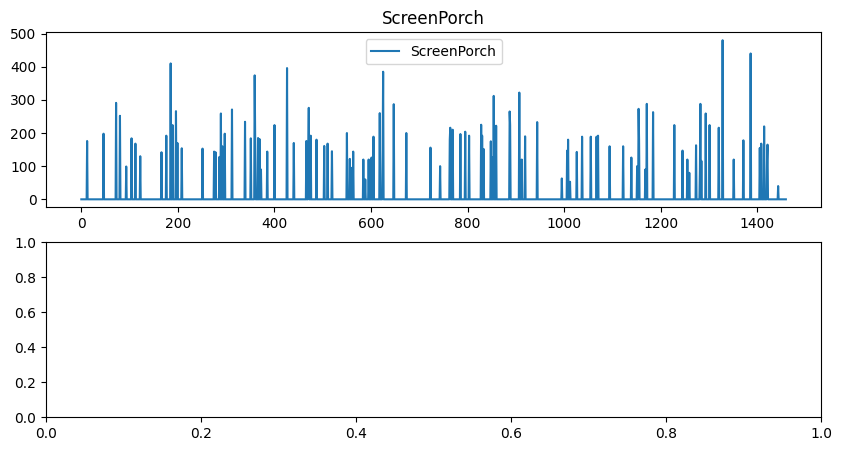

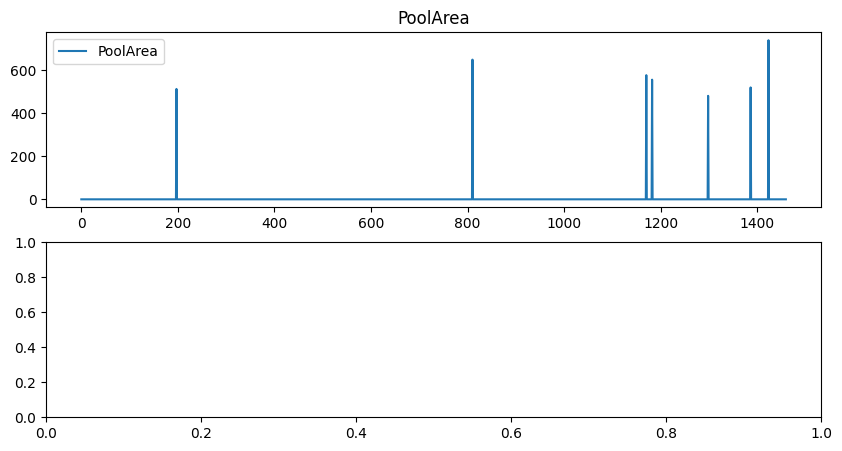

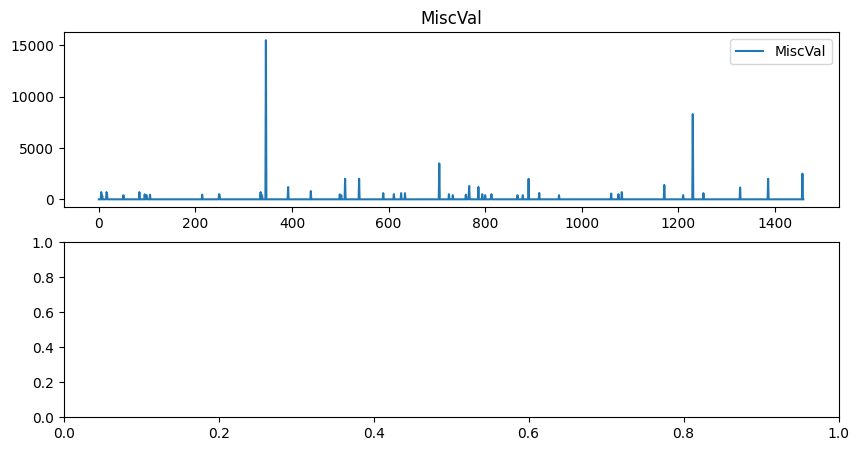

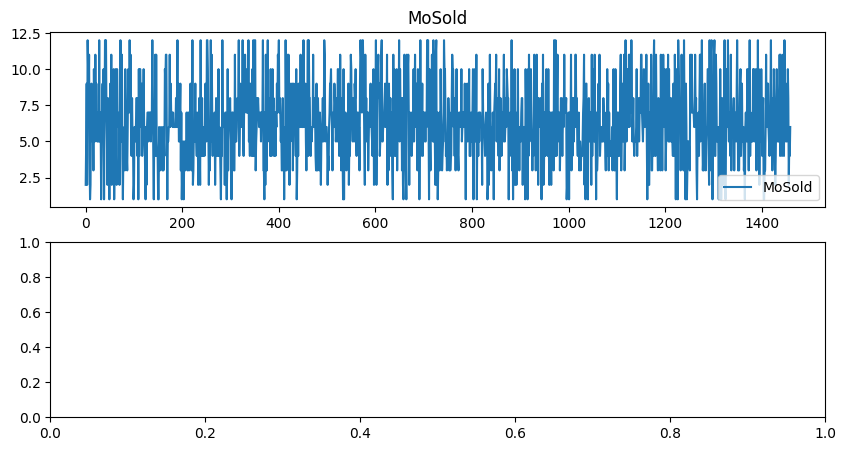

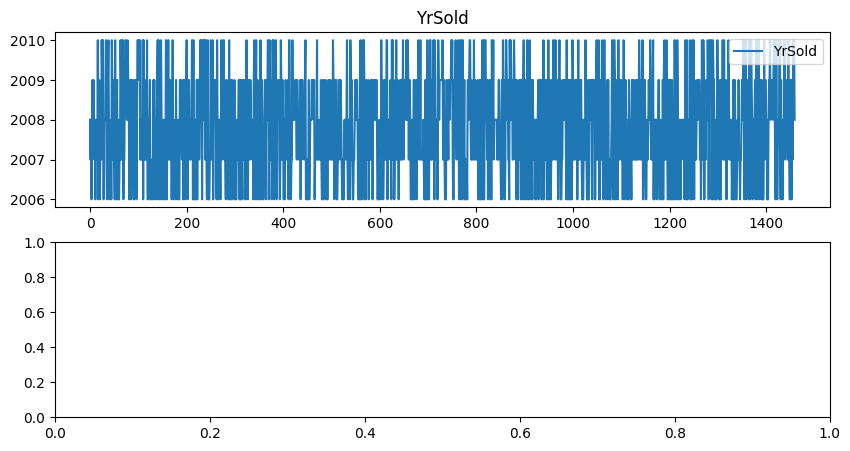

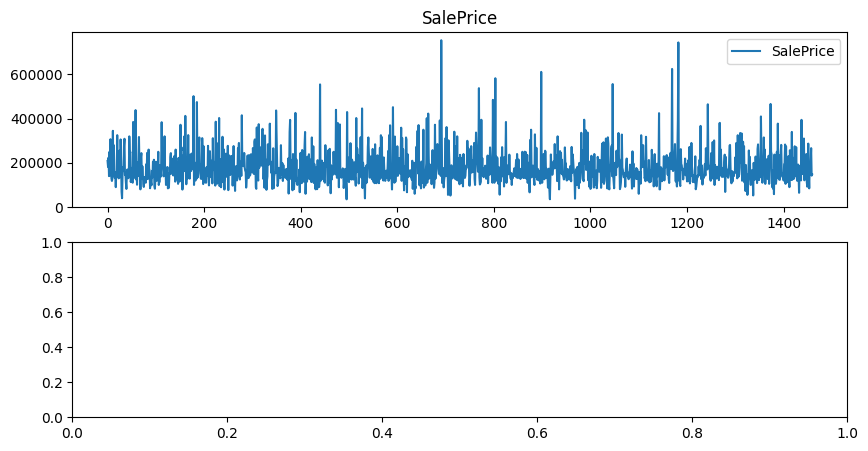

In [248]:
# Looping over all numeric columns to visualize all columns

for col in numeric_df.columns:
    fig, axes = pyplot.subplots(nrows=2,ncols=1,figsize=(40,30))
    numeric_df.plot(y=[col],figsize=(10,5),title=col,ax=axes[0])

In [249]:
# function for plotting corelation matrix
def plot_corelation_matrix(dataframe):
    corr_data =dataframe.corr()
    print("Correlation Map")

    fig, ax = pyplot.subplots(figsize=(30,20))
    seaborn.heatmap(corr_data,cmap="Greens",ax=ax,annot=True)


Correlation Map


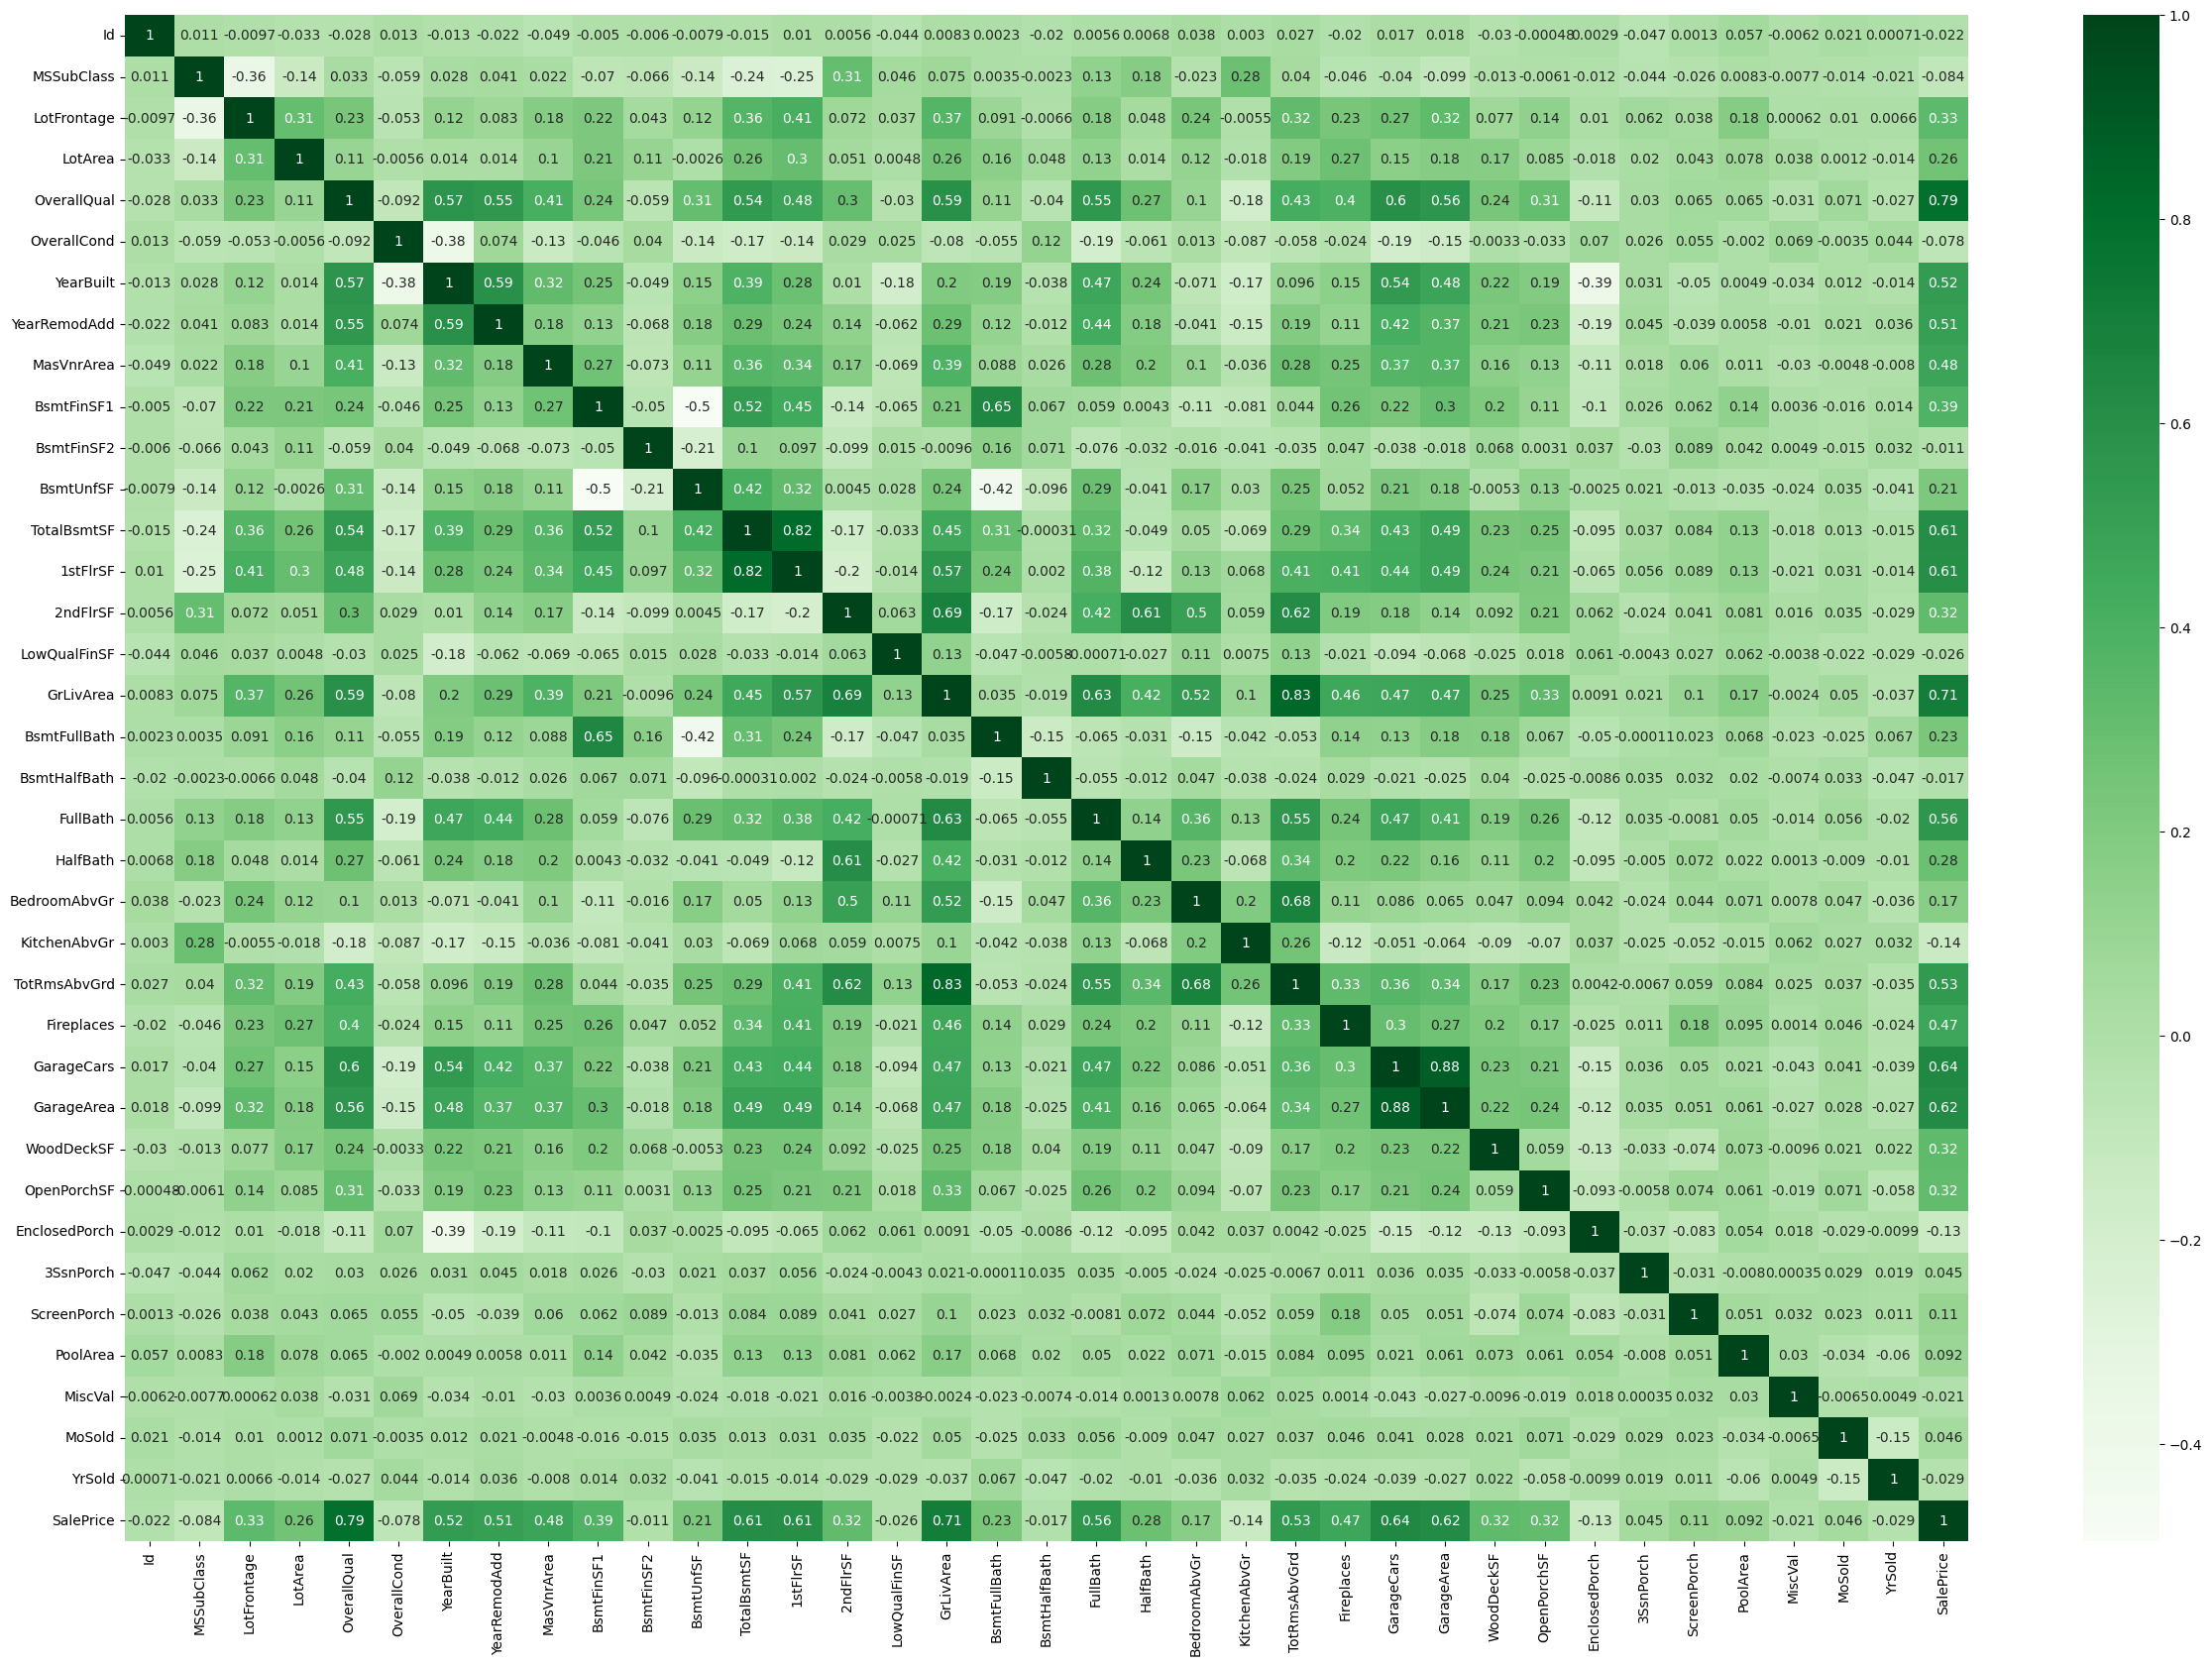

In [250]:
# Plotting pairwise correlation between variables 
plot_corelation_matrix(numeric_df)

* As we see there are lot of columns to be visualized it is better to analyze correlation numbers

In [251]:
numeric_df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009725,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.048764,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.356939,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.021832,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009725,-0.356939,1.000000,0.305929,0.234443,-0.053000,0.117250,0.082982,0.179466,0.215273,...,0.076505,0.137290,0.009982,0.062187,0.037675,0.180856,0.000619,0.010271,0.006619,0.334864
LotArea,-0.033226,-0.139781,0.305929,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104559,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234443,0.105806,1.000000,-0.091932,0.572323,0.550684,0.413271,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.053000,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.130432,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.117250,0.014228,0.572323,-0.375983,1.000000,0.592855,0.318319,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.082982,0.013788,0.550684,0.073741,0.592855,1.000000,0.182485,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.048764,0.021832,0.179466,0.104559,0.413271,-0.130432,0.318319,0.182485,1.000000,0.266127,...,0.157901,0.128117,-0.109410,0.018225,0.060096,0.011385,-0.030160,-0.004777,-0.007963,0.477542
BsmtFinSF1,-0.005024,-0.069836,0.215273,0.214103,0.239666,-0.046231,0.249503,0.128451,0.266127,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


#### Understanding categorical variables

In [252]:
# object_df subset contains categorical columns

object_df.describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,770,1379,1379.0,1379,1379,1379,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,...,7,5,6,97.0,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Typ,Gd,Attchd,2005.0,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,...,1360,380,870,65.0,605,1311,1326,1340,1267,1198


In [253]:
# Exploring categorical columns

for col in object_df.columns:
    print("Column Name: ", col)
    print(object_df[col].value_counts())
    print("")
    print(object_df[col].describe())
    print("--------------------------------")
    print("")

Column Name:  MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object
--------------------------------

Column Name:  Street
Pave    1454
Grvl       6
Name: Street, dtype: int64

count     1460
unique       2
top       Pave
freq      1454
Name: Street, dtype: object
--------------------------------

Column Name:  LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

count     1460
unique       4
top        Reg
freq       925
Name: LotShape, dtype: object
--------------------------------

Column Name:  LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

count     1460
unique       4
top        Lvl
freq      1311
Name: LandContour, dtype: object
--------------------------------

Column Name:  Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

count 

### 2. Data Cleaning and Manipulation

In [254]:
# creating one-hot encoding of categorical variables

categorical_df = pd.get_dummies(object_df,drop_first=True)

/home/sam/.local/lib/python3.8/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [255]:
# Concatinating numerical and one-hot encoded dataframes 

new_data = pd.concat([numeric_df,categorical_df],axis=1)

In [256]:
new_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


#### Dropping columns
* Dropping 'Id' column as it is a identifier and is not related to target variable.

#### Corelation between variables

Correlation between independent and target variable:


Correlation among independent variables:



In [257]:
new_data = new_data.drop(['Id'],axis=1)

### 3. Data Preparation for modelling

In [258]:
# Scaling columns for Lasso and Ridge Regression

cols = new_data.columns
scaled_df = pd.DataFrame(scale(new_data))
scaled_df.columns = cols

In [259]:
scaled_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.226101,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.505854,0.575425,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-0.872563,0.455190,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.577900,1.171992,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,0.073375,-0.089843,0.073480,0.651479,-0.517200,0.984752,0.830215,0.317856,0.092907,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,0.309859,-0.453198,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.577900,-0.499274,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,0.073375,0.636868,0.375148,1.374795,-0.517200,0.951632,0.733308,1.357375,0.463568,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [260]:
scaled_df['SalePrice']

0       0.347273
1       0.007288
2       0.536154
3      -0.515281
4       0.869843
          ...   
1455   -0.074560
1456    0.366161
1457    1.077611
1458   -0.488523
1459   -0.420841
Name: SalePrice, Length: 1460, dtype: float64

In [261]:
# Segregating predictor and target datasets

# Target Feature
y = scaled_df['SalePrice']

# Predictor Features
cols = list(cols)
cols.remove('SalePrice')
X_cols = cols
X = scaled_df[X_cols]

In [262]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.226101,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.505854,0.575425,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-0.872563,0.455190,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.577900,1.171992,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,0.073375,-0.089843,0.073480,0.651479,-0.517200,0.984752,0.830215,0.317856,0.092907,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,0.309859,-0.453198,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.577900,-0.499274,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,0.073375,0.636868,0.375148,1.374795,-0.517200,0.951632,0.733308,1.357375,0.463568,-0.288653,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [263]:
y.head()

0    0.347273
1    0.007288
2    0.536154
3   -0.515281
4    0.869843
Name: SalePrice, dtype: float64

In [264]:
# Creating training and test datasets from main dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [265]:
print("Train Shape: ", X_train.shape)
print("Test data Shape: ",X_test.shape)

Train Shape:  (1021, 331)
Test data Shape:  (438, 331)


### 3. Modelling Linear , Ridge and Lasso Models

In [266]:
# Linear Model
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [267]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

86334285.52360442
[-4.09358297e-02  3.42546096e-02  9.14753428e-02  9.99006673e-02
  8.36178398e-02  1.80004911e-01  3.20846941e-02  4.30261791e-02
  1.63159496e+10  5.77085757e+09  1.58068606e+10 -1.56937600e+10
 -2.05291730e+09 -2.31812003e+09 -2.58205720e+08  2.79048626e+09
  1.35176420e-02 -4.23489509e-03  1.74608160e-02 -3.21064881e-02
 -4.24281699e-02 -5.19250031e-02 -9.79239191e-03  2.18598825e-02
  4.05830057e-02  2.59208494e-02  1.53320854e-02  2.08196142e-02
  3.11437641e-03  8.18479103e-03  1.26184570e-02  5.94551580e-02
  4.30447332e-03 -5.95450401e-03 -2.00819969e-02  5.62772751e-02
  3.63631248e-02  1.52706385e-01  1.05680048e-01  2.09485292e-02
 -2.40945816e-03 -4.39381599e-03  1.79953575e-02 -3.65972519e-03
 -1.57365799e-02  5.69438934e-03 -3.39508057e-03  3.81074548e-02
 -1.89427137e-02 -2.64644623e-05 -3.41415405e-04  8.83460045e-04
 -3.66079807e-02  8.78882408e-03  9.42373276e-03  1.68836117e-02
 -1.09591484e-02 -1.77757740e-02  5.57266474e-02 -2.45921612e-02
 -9.583

In [268]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
metric.append(r2_train_lr)
print("Training Accuracy: ",r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metric.append(r2_test_lr)
print("Testing Accuracy: ",r2_test_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric.append(mse_test_lr**0.5)

Training Accuracy:  0.9561103273897368
Testing Accuracy:  -9.329706962259925e+18


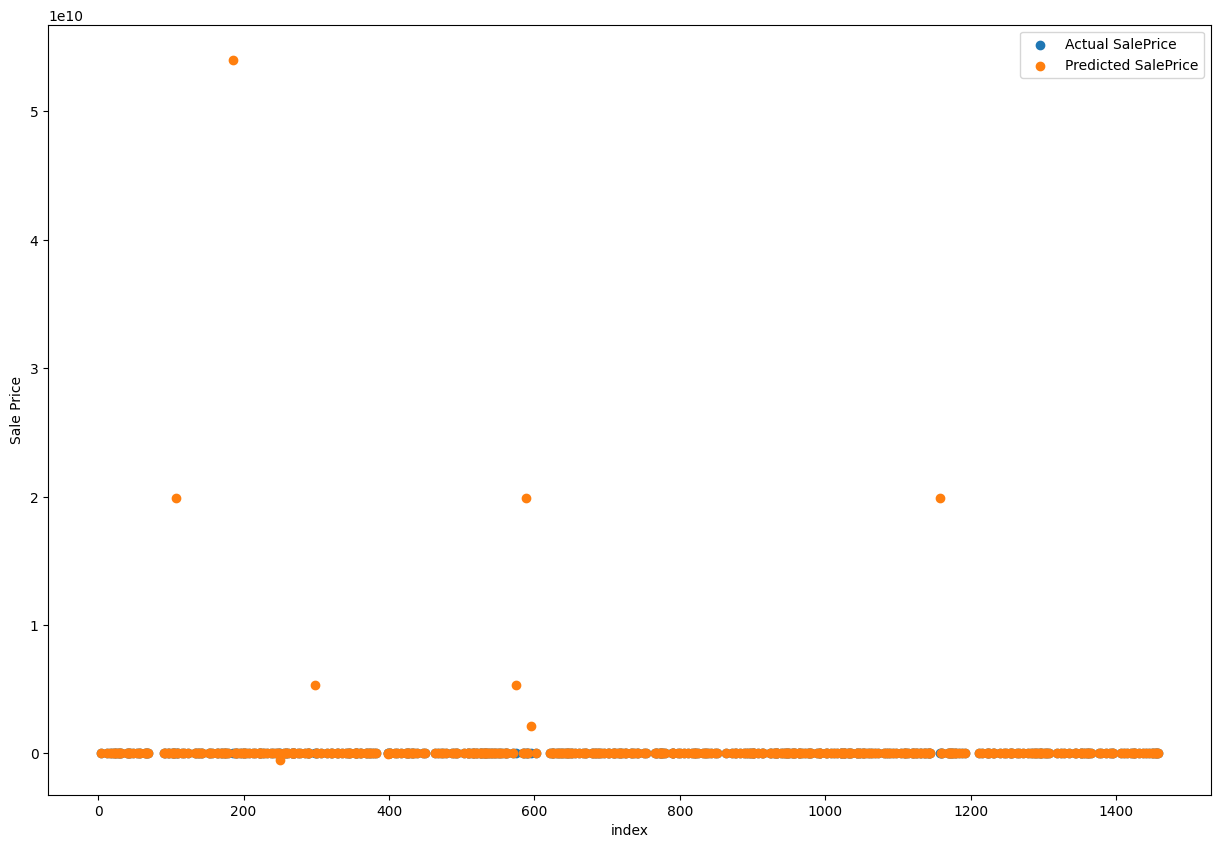

In [269]:
# plotting Regression line with model

fig,ax = pyplot.subplots(figsize=(15,10))
pyplot.scatter(x=X_test.index,y=y_test, label="Actual SalePrice")
pyplot.xlabel("index")
pyplot.ylabel("Sale Price")

pyplot.scatter(x=X_test.index,y=y_pred_test, label="Predicted SalePrice")
pyplot.legend()
pyplot.show()

In [270]:
# Ridge Regression Model

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [271]:
print("Best Hyper parameter (lambda) for Ridge Regression: ",model_cv.best_params_)

Best Hyper parameter (lambda) for Ridge Regression:  {'alpha': 500}


In [272]:
alpha_lambda = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha_lambda)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-3.48420660e-02  6.39695766e-03  3.44853963e-02  1.06003144e-01
  3.46782190e-02  2.28042664e-02  3.85082143e-02  4.88360293e-02
  3.02037850e-02  1.11091506e-02  1.40806634e-02  4.96683934e-02
  6.76555933e-02  6.26489946e-02 -6.06273623e-03  1.01256114e-01
  3.39431943e-02  1.25567757e-03  5.07593721e-02  2.32374555e-02
  4.84540542e-03 -2.50118712e-02  5.53048893e-02  4.35664514e-02
  5.78229902e-02  4.06743563e-02  2.56233761e-02  1.40442782e-02
 -7.11452428e-04  1.23376272e-02  1.63643370e-02 -2.33259399e-03
 -5.35758972e-04 -2.39226998e-03 -1.28815716e-02  5.24486271e-03
  1.02012806e-03  1.73207310e-02 -1.13774876e-02  8.08401990e-03
  3.95575419e-03 -2.79908408e-02 -2.80221217e-03  1.48520173e-02
  8.29493551e-03  1.86179349e-02 -1.04425366e-02  2.95071657e-02
 -1.39187619e-02 -6.35399368e-03 -4.89606497e-03  8.81297149e-03
  1.93639406e-03  1.56956076e-04 -6.31109806e-03 -5.30055764e-04
  2.66641353e-03 -1.58272521e-02  3.52113918e-02 -3.60156845e-02
 -1.83039986e-02 -8.62809

In [273]:
# Evaluating Ridge Model

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
metric2.append(r2_train_lr)
print("Training Accuracy: ",r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metric2.append(r2_test_lr)
print("Testing Accuracy: ",r2_test_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric2.append(mse_test_lr**0.5)

Training Accuracy:  0.8897861014322008
Testing Accuracy:  0.8532089758422403


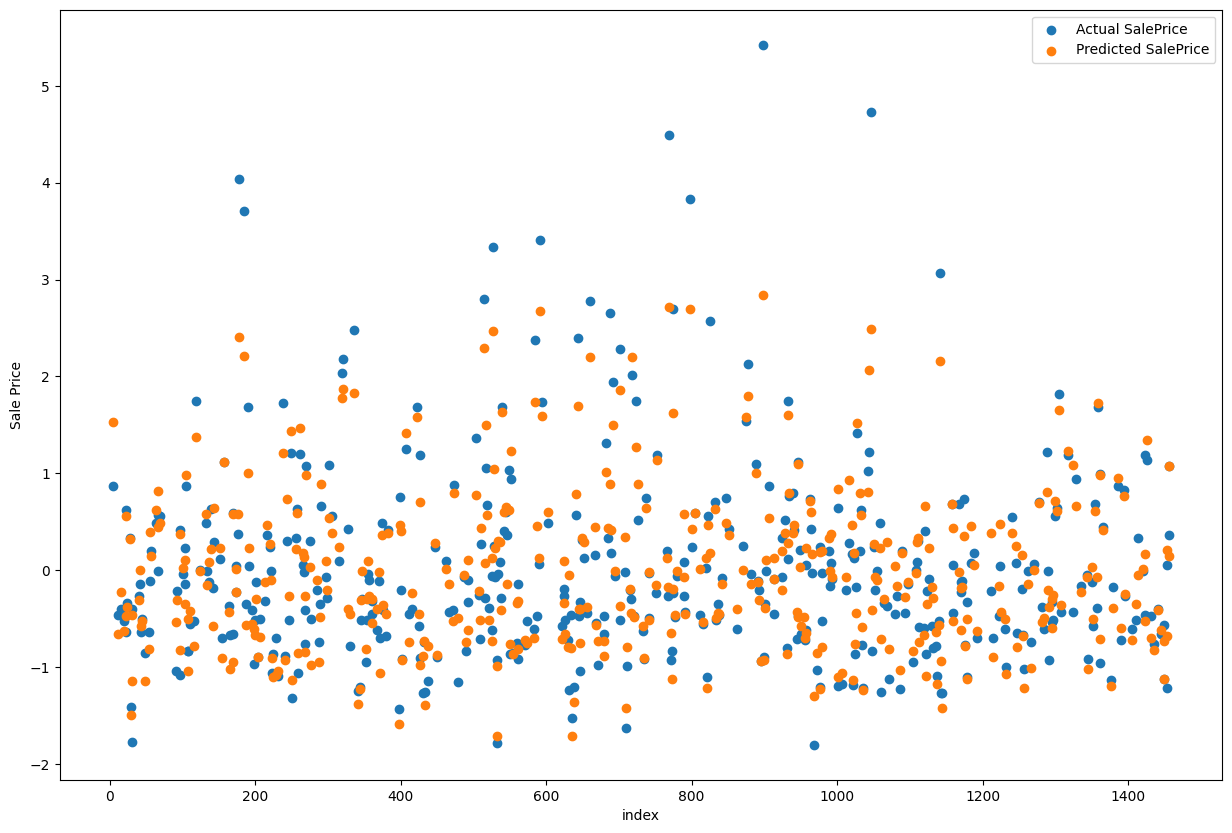

In [274]:
# plotting Regression line with model

fig,ax = pyplot.subplots(figsize=(15,10))
pyplot.scatter(x=X_test.index,y=y_test, label="Actual SalePrice")
pyplot.xlabel("index")
pyplot.ylabel("Sale Price")

pyplot.scatter(x=X_test.index,y=y_pred_test, label="Predicted SalePrice")
pyplot.legend()
pyplot.show()

In [275]:
# Lasso Regression Model

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


/home/sam/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.528e-01, tolerance: 8.406e-02
  model = cd_fast.enet_coordinate_descent(
/home/sam/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.011e-01, tolerance: 7.744e-02
  model = cd_fast.enet_coordinate_descent(
/home/sam/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.530e-02, to

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [276]:
print("Best value of hyper parameter (lambda):",model_cv.best_params_)

Best value of hyper parameter (lambda): {'alpha': 0.01}


In [277]:
model_cv.best_params_['alpha']

0.01

In [278]:
alpha =model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.01)

In [279]:
lasso.coef_

array([-8.09125274e-02, -0.00000000e+00,  4.16784331e-02,  1.95914071e-01,
        4.53922504e-02,  6.92426721e-02,  4.44948063e-02,  2.94021002e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.38836265e-02,
        0.00000000e+00,  0.00000000e+00, -1.68919703e-02,  3.44934315e-01,
        5.11545795e-02,  0.00000000e+00,  2.91315003e-02,  0.00000000e+00,
       -2.72243814e-03, -2.98531011e-02,  0.00000000e+00,  2.05261834e-02,
        8.52892112e-02,  0.00000000e+00,  1.22410570e-02,  0.00000000e+00,
       -0.00000000e+00,  3.39585141e-03,  8.07905809e-03, -3.70782615e-03,
       -0.00000000e+00, -0.00000000e+00, -4.44722676e-03,  0.00000000e+00,
        0.00000000e+00,  1.67520165e-02, -2.58045534e-03,  6.00969684e-03,
        0.00000000e+00, -3.06312965e-02, -0.00000000e+00,  0.00000000e+00,
        1.89387094e-03,  5.46369613e-03, -6.80052932e-03,  3.38714362e-02,
       -4.24508534e-03, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [280]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
metric3.append(r2_train_lr)
print("Training Accuracy: ",r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
metric3.append(r2_test_lr)
print("Testing Accuracy", r2_test_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
metric3.append(mse_test_lr**0.5)

Training Accuracy:  0.9011862872010535
Testing Accuracy 0.8416118898597202


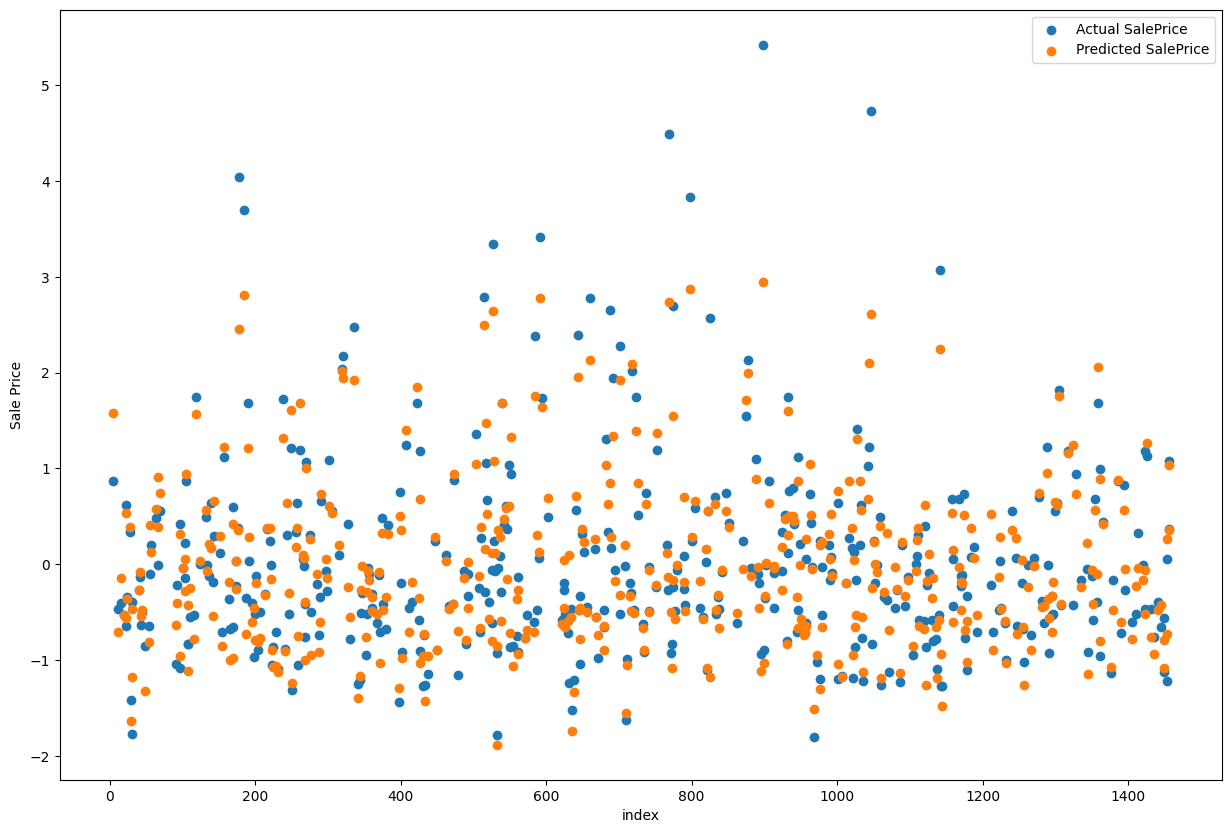

In [281]:
# plotting Regression line with model

fig,ax = pyplot.subplots(figsize=(15,10))
pyplot.scatter(x=X_test.index,y=y_test, label="Actual SalePrice")
pyplot.xlabel("index")
pyplot.ylabel("Sale Price")

pyplot.scatter(x=X_test.index,y=y_pred_test, label="Predicted SalePrice")
pyplot.legend()
pyplot.show()

In [282]:
evaluation_df = {'Metric': ['R2 Score Accuracy (Train)','R2 Score Accuracy (Test)','MSE (Train)','MSE (Test)'], 
        'Linear': metric
        }

lr_metric = pd.DataFrame(evaluation_df ,columns = ['Metric', 'Linear'] )

rg_metric = pd.Series(metric2, name = 'Ridge')
ls_metric = pd.Series(metric3, name = 'Lasso')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear,Ridge,Lasso
0,R2 Score Accuracy (Train),9.561103e-01,0.889786,0.901186
1,R2 Score Accuracy (Test),-9.329707e+18,0.853209,0.841612
2,MSE (Train),2.085443e-01,0.330472,0.312915
3,MSE (Test),3.085448e+09,0.387020,0.402018
